## Data Preprocessing:
- Mapping 'Sex' Column: Convert 'male' to 0 and 'female' to 1.
- Handling Missing Values: Fill missing 'Age' values with the median age.
- Creating Dummy Variables: Convert the 'Embarked' column to numerical values using one-hot encoding and drop the first category to avoid multicollinearity.
## Train-Test Split:
- Split the data into training and testing sets with 80% of the data used for training and 20% for testing.
## Model Training:
- Train a logistic regression model using the training data.
## Model Evaluation:
- Evaluate the model's performance using accuracy, confusion matrix, and classification report.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('train.csv')

# Preprocess the data
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'] = data['Age'].fillna(data['Age'].median())
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(max_iter=200, solver='saga')
model.fit(X_train, y_train)

# Manual implementation of the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate the linear combination (z) and apply the sigmoid function
z_train = np.dot(X_train, model.coef_.T) + model.intercept_
y_train_proba = sigmoid(z_train)

z_test = np.dot(X_test, model.coef_.T) + model.intercept_
y_test_proba = sigmoid(z_test)

# Make predictions based on the probabilities
y_pred = (y_test_proba >= 0.5).astype(int)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [34]:
X
print(type(['True']))

<class 'list'>


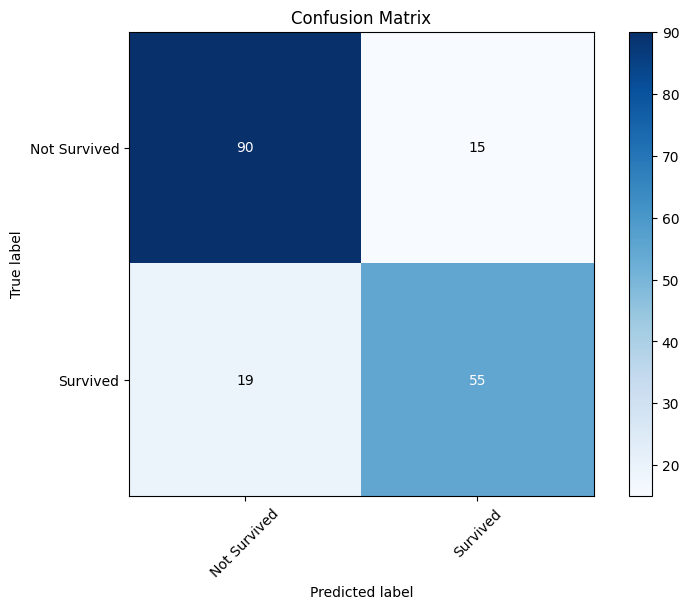

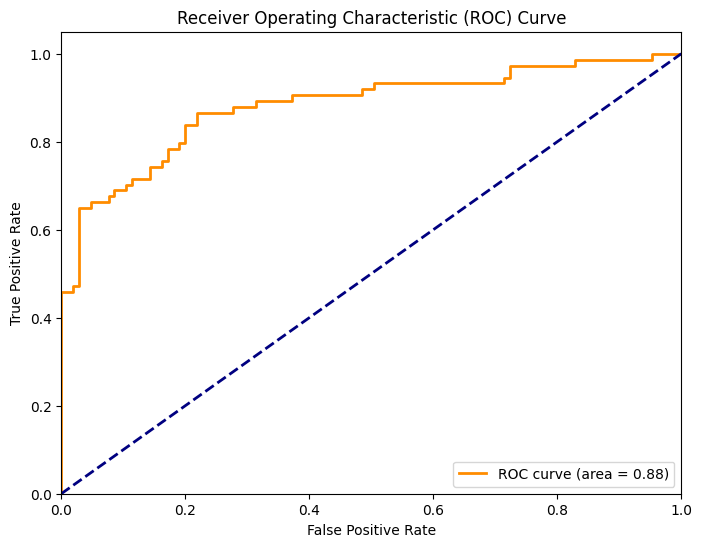

In [35]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Interactive ROC Curve using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (area = {roc_auc:.2f})',
                         line=dict(color='darkorange', width=2)))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess',
                         line=dict(color='navy', width=2, dash='dash')))

fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve',
                  xaxis=dict(title='False Positive Rate'),
                  yaxis=dict(title='True Positive Rate'),
                  showlegend=True)

fig.show()

## Confusion Matrix:

- The confusion matrix provides a summary of prediction results on a classification problem.
- The diagonal elements represent the number of correct predictions (true positives and true negatives).
- The off-diagonal elements represent incorrect predictions (false positives and false negatives).
- This matrix helps in understanding the types of errors the model is making.

## ROC Curve:

- The ROC curve is a graphical representation of a model's diagnostic ability.
- The true positive rate (sensitivity) is plotted against the false positive rate (1-specificity) at various threshold settings.
- The area under the ROC curve (AUC) provides an aggregate measure of performance across all classification thresholds.
- A higher AUC indicates a better performing model.

## Components of the Confusion Matrix
### True Positive (TP):
- *Definition*: The number of instances where the model correctly predicted the positive class.
- *Example*: If the model predicts that a passenger survived and they actually survived, it is counted as a TP.
- Consider a medical test for detecting a disease. A true positive is when the test correctly identifies a person with the disease as positive.
### True Negative (TN):
- *Definition*: The number of instances where the model correctly predicted the negative class.
- *Example*: If the model predicts that a passenger did not survive and they actually did not survive, it is counted as a TN.
- In the same medical test, a true negative is when the test correctly identifies a healthy person as negative.
### False Positive (FP):
- *Definition*: The number of instances where the model incorrectly predicted the positive class.
- *Example*: If the model predicts that a passenger survived but they did not survive, it is counted as a FP. This is also known as a Type I error.
- A false positive in the medical test scenario is when the test incorrectly identifies a healthy person as having the disease. This can cause unnecessary stress and further tests.
### False Negative (FN):
- *Definition*: The number of instances where the model incorrectly predicted the negative class.
- *Example*: If the model predicts that a passenger did not survive but they actually survived, it is counted as a FN. This is also known as a Type II error.
- In the medical test scenario, a false negative is when the test incorrectly identifies a person with the disease as negative. This can be dangerous as the disease might go untreated.

## Importance of Each Component
- *True Positives (TP) and True Negatives (TN)*: These represent the correctly classified instances and contribute to the overall accuracy of the model.
- *False Positives (FP)*: These are incorrect predictions where the model falsely alarms. In critical applications like medical diagnoses, FPs can lead to unnecessary treatments.
- *False Negatives (FN)*: These are incorrect predictions where the model fails to detect the actual positives. In critical applications, FNs can be more severe than FPs because they might lead to missed treatments.

<hr>

Predicted Not Survived (0)	Predicted Survived (1)

 Actual Not Survived (0) 80 10 
 
 Actual Survived (1)  5 45

<hr>

- TP (True Positive): 45 passengers were correctly predicted to have survived.
- TN (True Negative): 80 passengers were correctly predicted not to have survived.
- FP (False Positive): 10 passengers were incorrectly predicted to have survived (but they did not).
- FN (False Negative): 5 passengers were incorrectly predicted not to have survived (but they did).
 

<hr>

### Structure of a Multi-Class Confusion Matrix
For a problem with k classes, the confusion matrix will be a k×k table where:
- The rows represent the actual classes.
- The columns represent the predicted classes.
- Each cell in the matrix C(i,j) represents the number of instances where the actual class is i and the predicted class is j.

### Interpretation
- Diagonal Elements (True Positives for Each Class):
    - The diagonal elements C(i,i) represent the number of instances correctly predicted for each class.
    - For example, 50 instances of Class A were correctly predicted as Class A.
- Off-Diagonal Elements (Errors):
    - The off-diagonal elements represent the errors:C(i,j) where i ≠ j shows the number of instances where the actual class was i but was predicted as class j.



In [30]:
# Scatter Plot of Age vs. Fare Colored by Survival

fig = px.scatter(data, x='Age', y='Fare', color='Survived',
                 labels={'Survived': 'Survived'},
                 title='Scatter Plot of Age vs. Fare Colored by Survival')
fig.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('train.csv')

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'] = data['Age'].fillna(data['Age'].median())  # Updated line

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## precision : 
- Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- ### $\frac{TP}{TP + FP}$
- Imagine a medical test for detecting a disease. Precision measures how many of the patients diagnosed with the disease actually have the disease. A high precision means that there are few false positives.

## Recall : 
- Recall is the ratio of correctly predicted positive observations to all observations in the actual class.
- ### $\frac{TP}{TP + FN}$
- In the medical test example, recall measures how many of the patients who actually have the disease were correctly diagnosed. A high recall means that there are few false negatives.

## precision :
- The F1-score is the weighted average of precision and recall, providing a single metric that balances both concerns.
- ### 2 * $\frac{precision * recall }{precision + recall }$
- The F1-score considers both false positives and false negatives. It's useful when you need a balance between precision and recall.

## Support:
- Support is the number of actual occurrences of the class in the dataset.
- For Class 0: There are 105 actual instances of class 0.
- For Class 1: There are 74 actual instances of class 1.

## Accuracy:
- Accuracy is the ratio of correctly predicted observations to the total observations.
- ### $\frac{TP + TN }{TP + TN + FB + FN}$
- Accuracy measures how often the classifier is correct overall. It's a straightforward measure but can be misleading if the dataset is imbalanced.

## Macro Average:
- Macro average is the unweighted mean of precision, recall, and F1-score. It treats all classes equally.
- ### eg: macro precision =  $\frac{precision0 + precision1}{2}$

## Weighted Average:
- Weighted average takes into account the support (number of actual instances) of each class, giving a more global performance metric.
- ### eg: weighted precision = $\frac{(precision0 * support0) + (precision1 * support1)}{TotalSupport}$

- Precision tells you how many of the predicted positive cases were actually positive. High precision means fewer false positives.
- Recall tells you how many of the actual positive cases were correctly identified. High recall means fewer false negatives.
- F1-Score is the harmonic mean of precision and recall, providing a balance between the two.
- Support gives the number of instances of each class in the dataset, providing context for the other metrics.
- Accuracy measures the overall correctness of the model.
- Macro Average treats all classes equally, while Weighted Average takes class support into account.

In [6]:
# Multiclass classification

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px

# Set seed for reproducibility
np.random.seed(42)

# Generate time series data
date_range = pd.date_range(start='2020-01-01', periods=1000, freq='D')

# Generate categorical data
categories = ['A', 'B', 'C', 'D']
categorical_data = np.random.choice(categories, size=1000)

# Generate numerical features
feature_1 = np.random.randn(1000) * 10
feature_2 = np.random.randn(1000) * 20 + 50
feature_3 = np.random.randn(1000) * 5 - 20

# Generate target variable (4 classes as strings)
target = np.random.choice(['class_0', 'class_1', 'class_2', 'class_3'], size=1000)

# Create DataFrame
df = pd.DataFrame({
    'date': date_range,
    'category': categorical_data,
    'feature_1': feature_1,
    'feature_2': feature_2,
    'feature_3': feature_3,
    'target': target
})

# Display first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Split data into features and target
X = df.drop(columns=['date', 'target'])
y = df['target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode the categorical feature
# Scale the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['feature_1', 'feature_2', 'feature_3']),
        ('cat', OneHotEncoder(), ['category'])
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        date category  feature_1  feature_2  feature_3   target
0 2020-01-01        C   3.417560  76.034826 -21.152004  class_1
1 2020-01-02        D  18.761708  81.230224 -24.621166  class_3
2 2020-01-03        A   9.504238  50.640083 -15.549008  class_2
3 2020-01-04        C  -5.769037  34.931643 -14.823753  class_2
4 2020-01-05        C  -8.984147  59.199443 -29.230939  class_2
date         0
category     0
feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64


In [8]:
# print(y_train)
# print(X_train)

In [9]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.32      0.30        50
           1       0.23      0.08      0.12        59
           2       0.21      0.27      0.24        51
           3       0.24      0.33      0.28        40

    accuracy                           0.24       200
   macro avg       0.24      0.25      0.23       200
weighted avg       0.24      0.24      0.23       200

Confusion Matrix:
 [[16  8 14 12]
 [17  5 29  8]
 [ 9  7 14 21]
 [14  2 11 13]]


c:\Users\L E N O V O\data science\jagadish\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



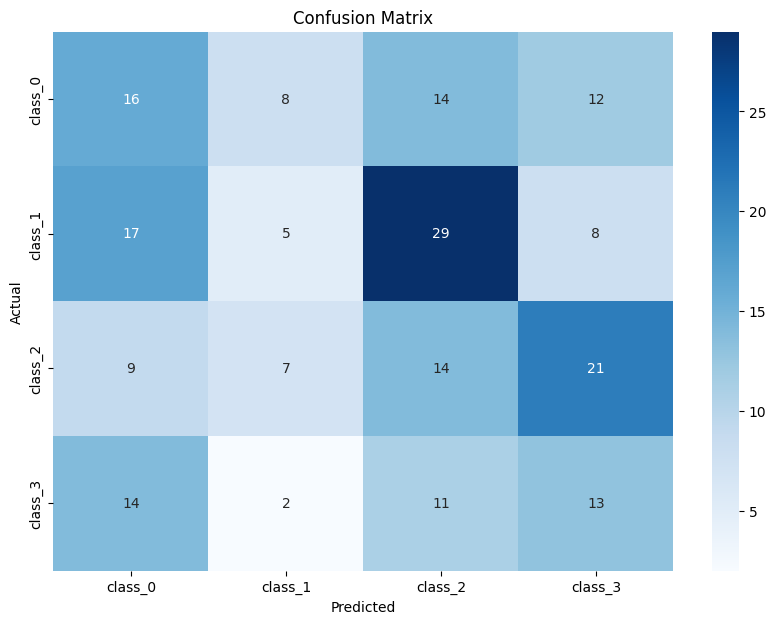

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objs as go

# Binarize the target variable for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
fig = go.Figure()

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'Class {class_name} (AUC={auc:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Chance'))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()


In [12]:

# Retrieve the model's coefficients (weights)
weights = model.coef_

# Create a DataFrame for visualization
weights_df = pd.DataFrame(weights, columns=preprocessor.get_feature_names_out())

# Plot the weights
fig = px.line(weights_df.T, title='Trained Weights of Logistic Regression Model')
fig.show()
